# Code Matrix:   Error-Correcting Output Codes

## The typical one discriminant per class 
It corresponds to the diagonal code matrix where L = K. For example, for K = 4,

In [67]:
%matplotlib inline

import numpy as np

# Code Matrix, 4 classifier, 4 classes
W=np.array([
   [+1, -1, -1,-1],  # A
   [-1, +1, -1,-1],  # B
   [-1, -1, +1,-1],  # C
   [-1, -1, -1,+1]]) # D

In [68]:
# Four Classifier decision
D=np.random.uniform(-1,+1,4)
D
# first classifer says is class A, second undecided, third:C, fourth:C

array([-0.11156779,  0.27586835,  0.39728899, -0.19773968])

In [69]:
# What L classifiers think about class A
y0= np.dot(W[0,:], D)
y0

-0.5869854462167978

In [70]:
# What the classifiers think about entire classes
y= np.dot(W, D)
y

array([-0.58698545,  0.18788683,  0.43072811, -0.75932924])

In [71]:
# Solution
Letters='A B C D'.split()
Letters[np.argmax(y)]

'C'

## Randomly generated code matrix
With K classes, there are $2^{ (K−1)} − 1$ possible columns, namely, two-class problems
For 4 classes , $2^{4-1} -1 = 7$  learners

In [72]:
import numpy as np
W=np.array([
   [-1, -1, -1,-1, -1, -1,-1],
   [-1, -1, -1,+1, +1, +1,+1],
   [-1, +1, +1,-1, -1, +1,+1],
   [+1, -1, +1,-1, +1, -1,+1]])


In [73]:
def convertToBinary(n):
 if n > 1:
  convertToBinary(n//2)
 print(n % 2,end = '')

convertToBinary(19)


10011

In [74]:
D=np.random.uniform(-1,+1,7)
D

# first:D, second A or B or D, .....

array([-0.54765276,  0.28113149, -0.43160075,  0.8270654 ,  0.39253299,
        0.4504419 ,  0.21734745])

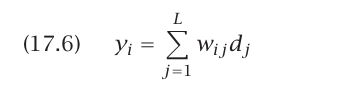

In [75]:
y0= np.dot(W[0,:], D)

In [76]:
y0

-1.1892657092791894

In [77]:
y= np.dot(W, D)
y

array([-1.18926571,  2.58550975, -0.15462553, -1.92801184])

In [78]:
# Solution
Letters[np.argmax(y)]

'B'

In [79]:
for i in range(10):
 D=np.random.uniform(-1,+1,7)
 y=np.dot(W,D)
 print(Letters[np.argmax(y)])

D
B
B
A
B
B
C
B
D
A


## Pairwise separation of classes

In [80]:
# ignore 0
W=np.array([
   [+1, +1, +1, 0,  0, 0],
   [-1,  0,  0,+1, +1, 0],
   [ 0, -1,  0,-1,  0, +1],
   [ 0,  0, -1, 0, -1, -1]])

In [81]:
D=np.random.uniform(-1,+1,6)
D


array([0.24799348, 0.76739472, 0.14010964, 0.37503857, 0.23997737,
       0.01228904])

In [82]:
y0= np.dot(W[0,:], D)
y0

1.1554978399968

In [83]:
y= np.dot(W, D)
y

array([ 1.15549784,  0.36702245, -1.13014424, -0.39237605])

In [84]:
print(Letters[np.argmax(y)])

A


In [85]:
# OR 
D=[-1,0,0,0,0,0]
y= np.dot(W, D)
y


array([-1,  1,  0,  0])

In [86]:
# OR 
D=[1,0,0,0,0,0]
y= np.dot(W, D)
y

array([ 1, -1,  0,  0])

In [87]:
print(Letters[np.argmax(y)])

A


# Bagging
* Generate L samples $X_{j} , j =1, . . . , L, $
* The base-learners $d_{j}$ are trained with these L samples $X_{j} $.
* During test, do average or apply mode

In [163]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [164]:
x_train[1]

array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
       7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
       1.4700e+01, 3.9538e+02, 3.1100e+00])

In [165]:
x_train.shape

(404, 13)

In [166]:
len(y_train)

404

In [167]:
import sklearn
from sklearn.linear_model import LinearRegression

In [168]:
clf= LinearRegression()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)

In [169]:
len(pred)

102

In [170]:
pred

array([ 9.69267239, 21.05859431, 20.94145461, 34.25223414, 25.95902598,
       20.56741038, 28.15310405, 25.07113862, 20.30519458, 22.82489511,
       20.29027213, 18.07938917, 16.46141024, 35.31166595, 19.41369959,
       19.34727116, 24.58140904, 21.01346252, 19.99079236, 23.79286427,
       12.20780045, 17.14218992, 22.51468752, 12.92570511, 21.18070615,
       23.94073547, 33.46176314, 24.2631555 , 13.35213096, 20.71939252,
       23.45082103, 19.1486881 , 36.09743765, 23.47113531, 19.03141995,
        5.92425733, 14.02090469, 22.96425377, 16.01731242, 27.09134249,
       22.06997029, 28.61755389, 17.75679772, 34.75579014, 31.29455712,
       24.73234165, 31.12655323, 18.09268992, 22.62638989, 24.21208909,
       30.5854317 , 18.71860574, 10.50163617, 13.73779292, 34.4022841 ,
       27.53140317, 18.08151522, 40.05101982, 37.63271513, 24.64021422,
       25.73823434, 20.64369987, 20.33514699, 21.38393124, 24.63485497,
       23.53071805, 17.42141466, 26.76911736,  3.83782148, 11.97

In [171]:

sklearn.metrics.mean_absolute_error(pred, y_test)

3.464185812406727

In [172]:
np.mean(y_test),np.std(y_test)

(23.07843137254902, 9.123806690181466)

In [173]:
y_test

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

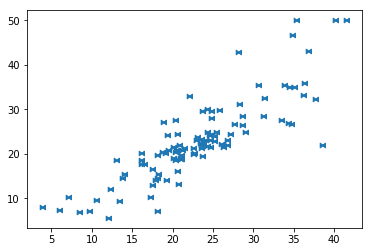

In [174]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(pred, y_test, marker=r'$\bowtie$',
            label="Pred")
plt.show()

In [175]:
x_train.shape

(404, 13)

In [176]:
x_test.shape

(102, 13)

In [177]:
# sample 
idx = np.random.randint(x_train.shape[0], size=7)
idx

array([  2,  67,  94, 244, 397, 357,  77])

In [178]:
print(x_train[idx,:10])

[[4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02]
 [2.20511e+01 0.00000e+00 1.81000e+01 0.00000e+00 7.40000e-01 5.81800e+00
  9.24000e+01 1.86620e+00 2.40000e+01 6.66000e+02]
 [1.20830e-01 0.00000e+00 2.89000e+00 0.00000e+00 4.45000e-01 8.06900e+00
  7.60000e+01 3.49520e+00 2.00000e+00 2.76000e+02]
 [4.07710e-01 0.00000e+00 6.20000e+00 1.00000e+00 5.07000e-01 6.16400e+00
  9.13000e+01 3.04800e+00 8.00000e+00 3.07000e+02]
 [2.29690e-01 0.00000e+00 1.05900e+01 0.00000e+00 4.89000e-01 6.32600e+00
  5.25000e+01 4.35490e+00 4.00000e+00 2.77000e+02]
 [6.72400e-02 0.00000e+00 3.24000e+00 0.00000e+00 4.60000e-01 6.33300e+00
  1.72000e+01 5.21460e+00 4.00000e+00 4.30000e+02]
 [8.81250e-01 0.00000e+00 2.18900e+01 0.00000e+00 6.24000e-01 5.63700e+00
  9.47000e+01 1.97990e+00 4.00000e+00 4.37000e+02]]


In [179]:

# N= 404
idx = np.random.randint(x_train.shape[0], size=404)
idx

# idx = np.random.choice(range(len(x_train)), 404)
# idx

array([307, 209, 118, 143, 115, 118, 165, 354, 376, 106, 115, 265, 134,
       385,  24,  87,  93, 158, 174, 268,  34, 104, 348,  83,  31, 395,
       273, 100, 287, 171, 343,  30, 336, 136, 235, 242, 360, 250, 194,
       361,  33, 179, 133, 261, 207, 301, 302, 131, 156,  60,  33,  72,
        78, 210, 344,  57, 399, 375, 270, 126,  87,  40, 262, 321, 385,
       238, 140, 112, 357, 393, 148,   4, 388, 379,   1, 401,  18, 340,
        32, 361, 266, 153, 161, 261, 132,  48,  40, 338, 119, 376, 268,
        47, 384, 310, 362, 106,  85, 312, 346,  90,  92, 208,  54, 350,
       296,  75,  98, 148, 329, 252, 329,  35, 306, 282,   5,   0,  61,
       130,  10, 177,  40,  36, 248, 399,  97, 171, 139, 327,  36, 156,
       261, 217, 185, 389,   2, 321, 345, 257, 272, 149,  78, 205, 357,
       304, 331,  20, 158, 143, 161, 270, 264, 322, 233,  31,  78,  18,
        56,  34, 260, 323,  26, 398, 262, 178, 329, 219, 226,  76, 281,
       113, 179, 289,   4, 372, 222,  19, 190,  59, 305, 358, 37

In [180]:
min(idx)

0

In [181]:
len(list(set(idx)))

261

In [182]:
x_trainQ= x_train[idx,:]
y_trainQ= y_train[idx]

clf=LinearRegression()
clf.fit(x_trainQ, y_trainQ)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
clfList=[]
clfList.append(clf)

# TASK-1

* Create 10 different classifier by sampling the X_TRAIN, BOSTON HOUSE PRICE
* Apply your ensembled learners to test data 


In [184]:
N = 10
clfList = []
for i in range(N):
    idx = np.random.choice(len(x_train), len(x_train), replace=True)
    x = x_train[idx]
    y = y_train[idx]
    clf=LinearRegression()
    clf.fit(x,y)
    clfList.append(clf)

x_train.shape

(404, 13)

In [191]:
pred = []
i = 0
x_test.shape

np.mean([clf.predict([x_test[0]])[0] for clf in clfList])

10.254677825077394

In [111]:
N = 10

L = []
for i in range(N):
    idx = np.random.choice(range(len(x_train)), len(x_train))
    
    x = x_train[idx]
    y = y_train[idx]
    
    clf = LinearRegression()
    clf.fit(x,y)
    L.append(clf)

In [129]:
pred = []
i = 0
for i in range(len(x_test)):
    pred.append(np.mean([l.predict([x_test[i]]) for l in L]))

L[1].predict
pred = np.array(pred)
#[l.predict(x_test[i]) for l in L]

array([ 9.92873549, 20.92749905, 21.46020132, 33.04180895, 26.16646998,
       20.65889039, 27.86543045, 25.15922695, 20.39291278, 22.47446912,
       20.62391817, 18.23348016, 16.00317744, 35.18116422, 19.41907702,
       19.48010147, 24.46003348, 20.87621899, 19.73414233, 22.90497891,
       12.23106895, 17.50798672, 22.88337661, 13.22541073, 21.07309046,
       23.55858158, 32.59798385, 24.45516803, 13.64012698, 20.72967738,
       23.2451589 , 19.09321764, 35.11889451, 23.4201279 , 18.82868904,
        6.03701779, 14.29887513, 22.9704424 , 14.6961239 , 27.02958864,
       22.08948791, 28.61159585, 17.59194363, 34.55779898, 31.53642121,
       25.18849871, 31.42530155, 18.3165921 , 22.38390946, 24.29557977,
       30.46986227, 18.75438573, 10.70034999, 13.97789154, 33.82652913,
       27.57508446, 17.77753003, 39.65695428, 36.65440604, 24.6730922 ,
       25.26703171, 20.3594025 , 20.06999601, 21.41845394, 24.73595959,
       23.32553976, 17.35387661, 26.80556621,  2.98148216, 11.68

In [130]:
sklearn.metrics.mean_absolute_error(pred, y_test)

3.4003339594378517

In [64]:
# ensemble of learners
clfList=[]
N = 10

for i in range (N):
    idx = np.random.randint(x_train.shape[0], size=x_train.shape[0])
    
    x_trainQ= x_train[idx]
    y_trainQ= y_train[idx]

    clf=LinearRegression()
    clf.fit(x_trainQ, y_trainQ)
    
    clfList.append(clf)

In [65]:
# predict value

ensemble_size = N

results = [clfList[j].predict(x_test) for j in range(ensemble_size)]
predict = []
error = 0

for i in range(len(x_test)):
    pred = (np.mean([results[j][i] for j in range(len(results))]))
    predict.append(pred)
    error += np.abs(pred - y_test[i])

mean_abs_error = error / len(x_test)
mean_abs_error



3.300122633132602

In [66]:
sklearn.metrics.mean_absolute_error(predict, y_test)

3.300122633132602

# TASK 2
## Ada Boost Algorithm

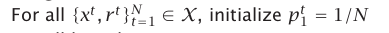

* N: the number of examples, 500
* F: number of feature: 15
* L: the number of learners, 10
* $p_{j}^{t}= $  denotes the probability that the instance $pair (x_{t} , r_{t})$ is drawn to train the j-th base-learner.
* Initial condition $p_{1}^{t}=$  1/N

In [132]:
# create a dataset
import numpy as np
from sklearn.datasets import make_classification
N= 500 #500 points
F= 50  #50 features
L= 10  #10 learners
X,y= make_classification(N,  n_features=F, flip_y=0.80)

prob=np.repeat(1/N,N)

idx=np.random.choice(N,N, p=prob)
idx=list(set(idx))


In [133]:
import sklearn
from sklearn.linear_model import LogisticRegression

#Example of one logistic regression
clf=LogisticRegression(solver='lbfgs')
clf.fit(X,y)
result = clf.predict(X)
correct = result == y
print(sum(correct),len(y))
sum(clf.predict(X) == y)/len(y)

323 500


0.646

In [134]:
E=(N-sum(correct)) / N
B= E/(1-E)
E,B

(0.354, 0.5479876160990712)

In [148]:
prob = np.repeat(1/N,N)
for i in range(L):
    idx = np.random.choice(N, N, p=prob)
    idx = list(set(idx))

    x_train = X[idx]
    y_train = y[idx]

    clf=LogisticRegression(solver='lbfgs')
    clf.fit(x_train,y_train)
    result = clf.predict(X)
    correct = result == y
    print(sum(correct))
    #E = (N - sum(correct)) / N #percent accuracy
    
    E = 0
    for t in range(len(X)):
        if (correct[t] == False):
            E += prob[t]
    B = E / (1-E)
    
    for t in range(len(X)):
        if (correct[t] == False):
            prob[t] = B*prob[t] #boost probility
    
    #normalize
    prob = prob / sum(prob)
    

305
320
325
328
321
318
318
321
319
320


In [196]:
prob=np.repeat(1/N,N)
prob

array([0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002,

In [226]:
#training
prob=np.repeat(1/N,N)

B = []
base_learners = []

for j in range (L):
    idx=np.random.choice(N,N, p=prob)
    idx=list(set(idx))
    
    Xj=X[idx]
    yj=y[idx]

    clf=LogisticRegression(solver='lbfgs')
    clf.fit(Xj,yj)
    
    result = clf.predict(X)
    correct = result == y
    
    E = 0
    
    for t in range(len(correct)):
        if (correct[t] == False):
            E += prob[t] 
    
    base_learners.append(clf)
    B.append(E/(1-E))
    
    if E < 0.5:
        break
        
    for i in range (len(result)):
        if result[i]==y[i]:
            prob[i] = B*prob[i]
            
    #normalize probabilies
    z = sum(prob)
    prob = prob / z
    

In [228]:
#testing
d = []
for j in range(len(base_learners)):
    d.append(base_learners[j].predict(X))

d
        

[array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 

In [229]:
y

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [183]:
len(correct[correct == False])

77

In [164]:
base_learners

[]